# FLOWER SPECIES CLASSIFICATION USING MACHINE **LEARNING**

## OBJECTIVE

The objective of this project is to predict the likelihood of a flower species being correctly identified based on various factors such as image quality, lighting conditions, and species characteristics. By leveraging machine learning models and analyzing historical image data, we seek to develop predictive models that can help stakeholders, including researchers and educators, accurately and efficiently identify different flower species in diverse conditions. This predictive capability will enable better resource allocation in botanical studies, improve educational tools, and enhance the overall accuracy of species identification efforts

# Importing Tools

In [1]:
pip install fastai


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [2]:
!pip install google_images_download


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.2/467.2 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s eta 0:00:00
  Created wheel for google_images_download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14534 sha256=11cd2a5a643365e29b6c9f98dc80e9e0b810d667e375178bf3584795c0a47f57
  Stored in directory: /root/.cache/pip/wheels/5b/f2/64/0eecb22fee5cbc0321d332492ddcc45b03c6373b5616ee95c8
Successfully built google_images_download


In [ ]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.0 MB/s et

# Reading the Dataset

In [3]:
from google.colab import drive  # Importing the drive module from google.colab library
drive.mount('/content/drive')   # Mounting Google Drive to the '/content/drive' directory


Mounted at /content/drive


In [4]:
path = "/content/drive/MyDrive/Colab Notebooks/flowers_1"

In [5]:
from fastai.vision.all import *

# Defining the path to your dataset directory
path = Path("/content/drive/MyDrive/flowers_1")

# Defining data transformations
item_tfms = Resize(224)

# Creating a DataBlock
flowers = DataBlock(blocks=(ImageBlock, CategoryBlock),
                    get_items=get_image_files,
                    splitter=RandomSplitter(valid_pct=0.2, seed=42),
                    get_y=parent_label,
                    item_tfms=item_tfms)

# Checking the list of image files in the dataset directory
image_files = get_image_files(path)
print("Number of image files found:", len(image_files))
print("Sample image file:", image_files[0])

# Loading and preprocess the dataset
print("Setting up dataloaders...")
try:
    dblock = flowers.dataloaders(path)
    print("DataLoaders setup successful!")
except Exception as e:
    print("Error during DataLoaders setup:", e)


Number of image files found: 3363
Sample image file: /content/drive/MyDrive/flowers_1/daisy/9158041313_7a6a102f7a_n.jpg
Setting up dataloaders...
DataLoaders setup successful!


# Feature Engineering

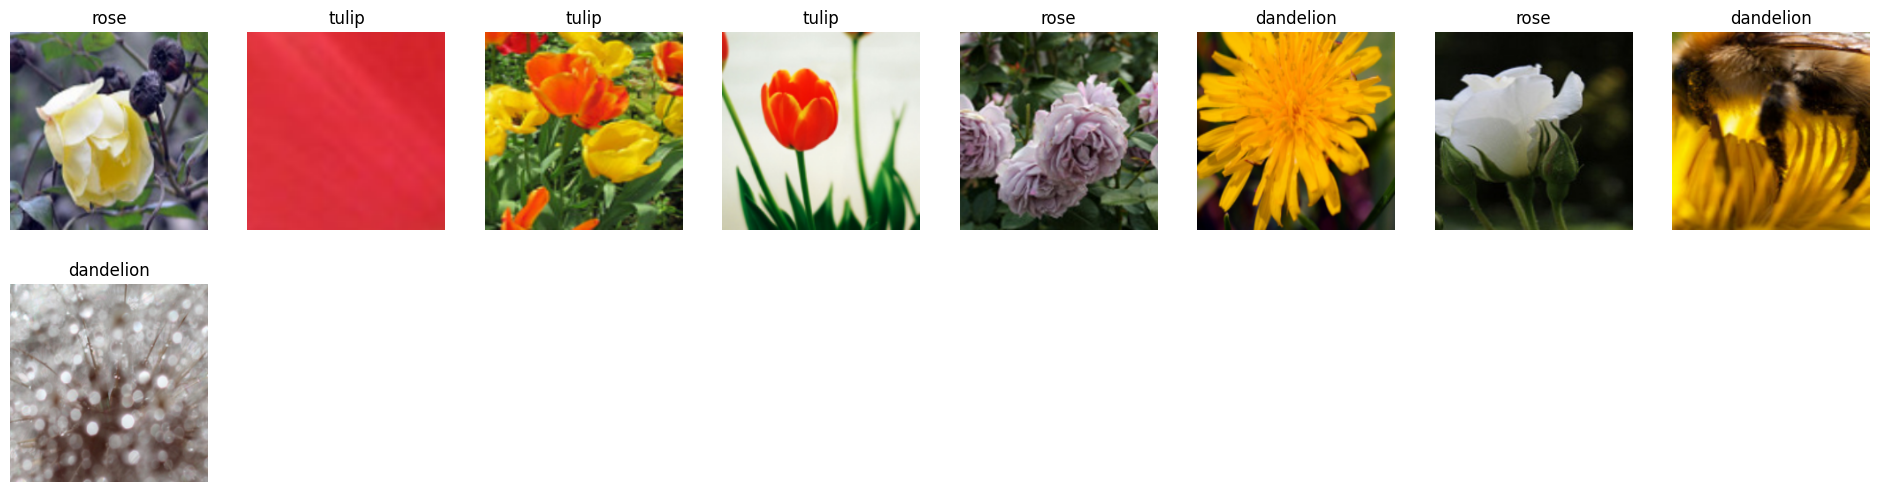

In [6]:
from fastai.vision.all import *

# Defining data augmentation and preprocessing transforms
item_tfms = [Resize(224), FlipItem(), RandomResizedCrop(224)]
batch_tfms = [Normalize.from_stats(*imagenet_stats)]

# Defining the DataBlock for flowers dataset
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=item_tfms,
    batch_tfms=batch_tfms
).dataloaders(path, bs=64)

# Showing a batch of data with more images
dblock.show_batch(nrows=2, ncols=8)


The above code is used to verify the effectiveness of image labeling. It allows users to ensure that each flower image is accurately labeled based on its corresponding name. This is achieved by mounting Google Drive within the Google Colab environment and examining the labeling of flower images stored in the mounted drive directory.

# Training Image Classifier with Fastai

In [9]:
import os
os.environ["JAX_DISABLE_JIT"] = "1"


# Model Building

In [8]:
from fastai.vision.all import *

# Creating a learner using a pre-trained model architecture (e.g., resnet34)
learn = vision_learner(dblock, resnet34, metrics=error_rate)

# Fine-tune the model
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 132MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.254391,0.406603,0.120536,19:35


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch,train_loss,valid_loss,error_rate,time
0,0.553896,0.303445,0.092262,27:52
1,0.386080,0.229720,0.069940,28:14


we can observe that model's performance is improving over epochs, as indicated by decreasing values of both training and validation loss, along with decreasing error rates. This suggests that the model is learning to classify images more accurately as training progresses

In [10]:
# Save the trained model
learn.export('flower_classifier.pkl')

# Evaluating the Model

In [11]:
# Define the URL of a daisy image
daisy_image_url = 'https://lh6.googleusercontent.com/-15g_m2Gb3Ao/TY0ks1_lgfI/AAAAAAAAAEQ/NZ-1nKg0GHk/s1600/white+daisy.jpg'


In [12]:
# Importing necessary libraries
from fastdownload import download_url
from fastai.vision.all import *

# Function to download the image from URL
def download_image(url, dest):
    download_url(url, dest, show_progress=False)

In [13]:
# Downloading the daisy image
daisy_destination = 'daisy.jpg'
download_image(daisy_image_url, daisy_destination)

# Open the downloaded image
daisy_image = Image.open(daisy_destination)


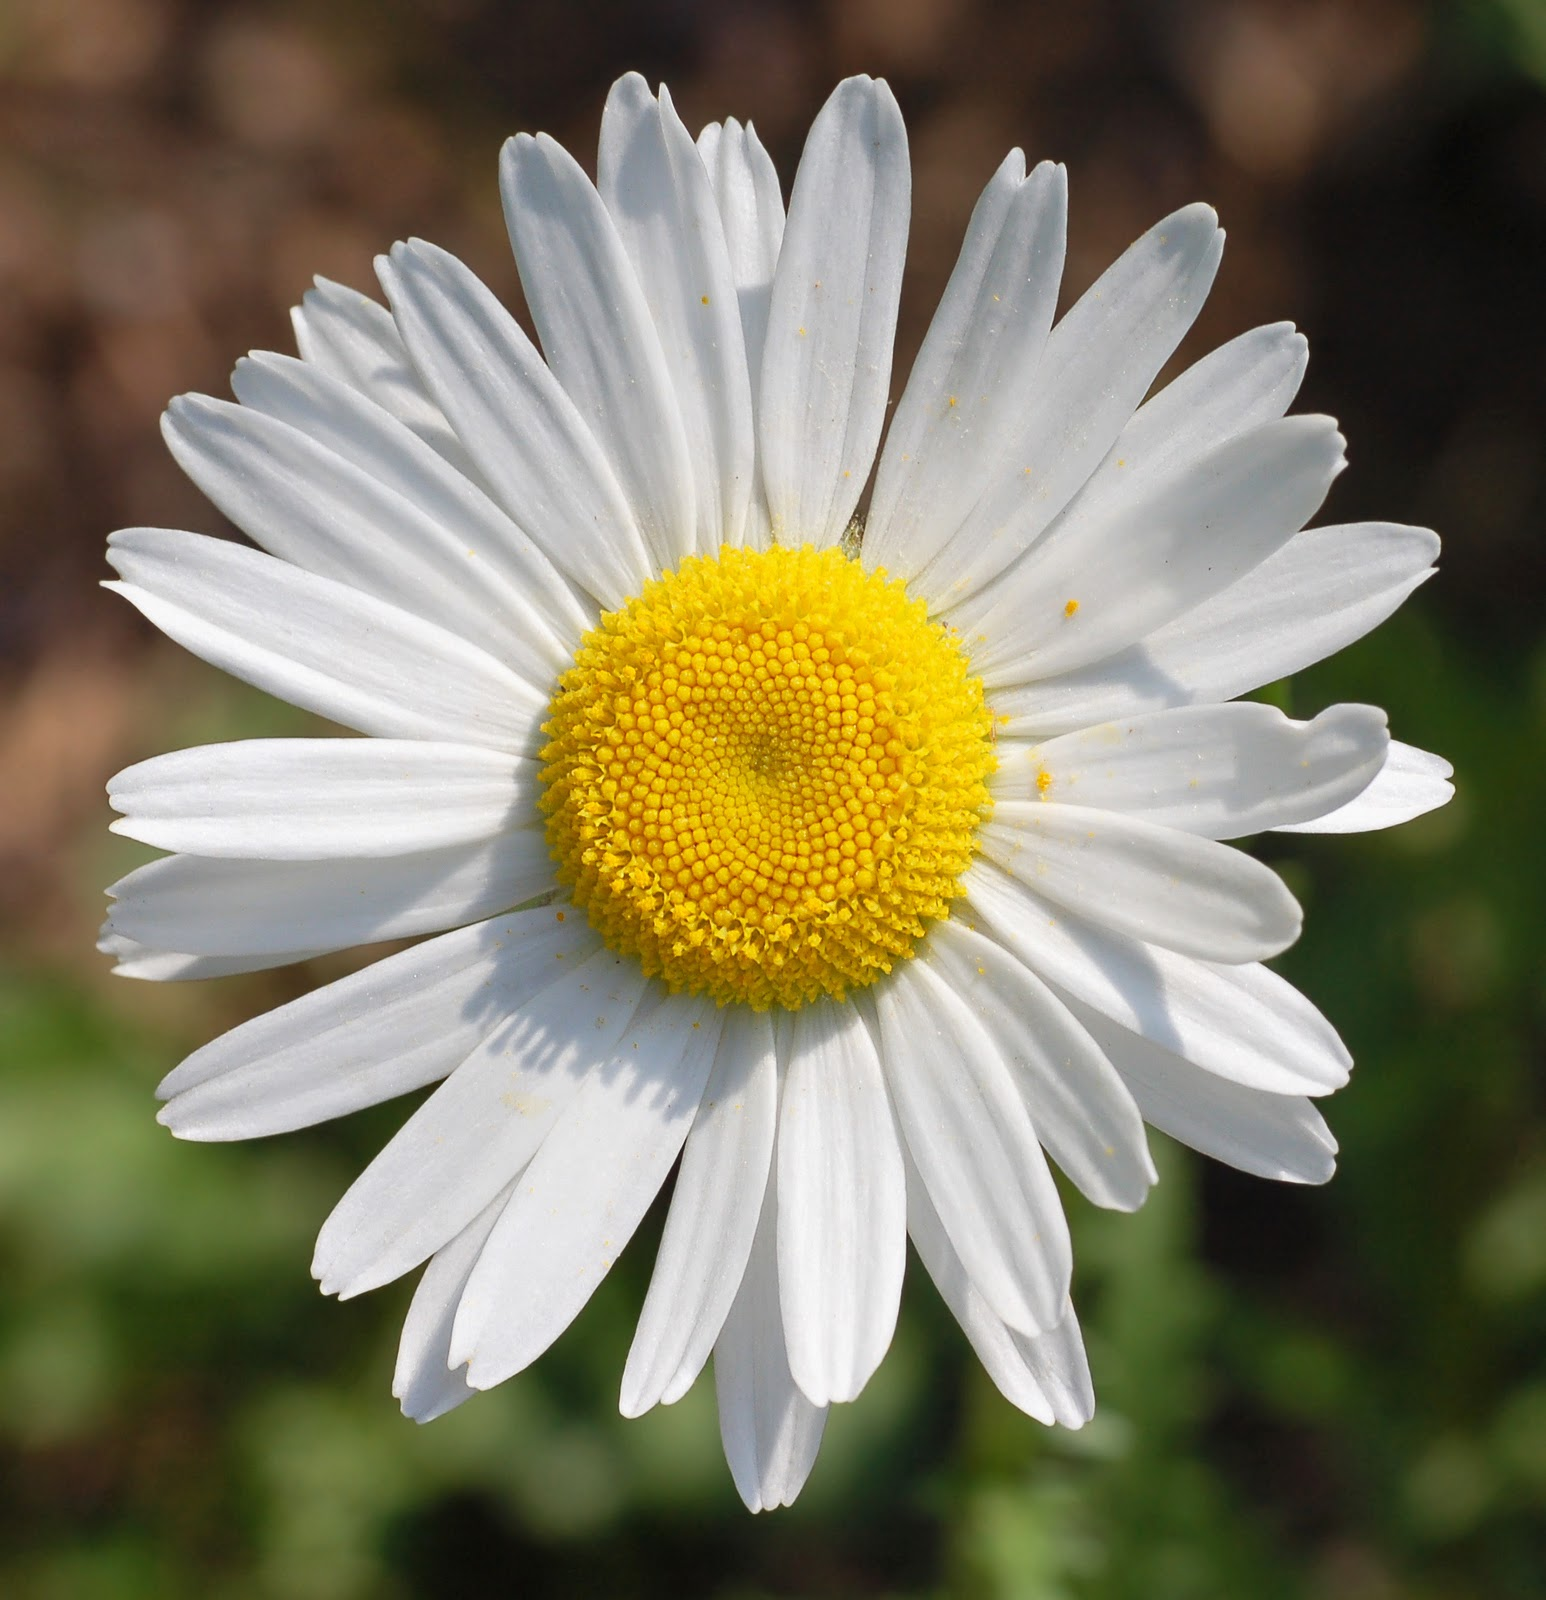

In [14]:
from IPython.display import display

# Display the thumbnail
display(daisy_image)



In [15]:


# Make predictions on the daisy image
img = PILImage.create(daisy_destination)
is_daisy, _, probs = learn.predict(img)

# Display the prediction
print(is_daisy)
print("Probabilities:", probs)

daisy
Probabilities: tensor([9.9389e-01, 4.9146e-03, 2.5469e-07, 1.1754e-03, 1.8586e-05])


# Deployment

In [16]:
!pip install -U gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.2 MB/s et

In [ ]:
import gradio as gr
from fastai.vision.all import *

# Load your trained model
learn = load_learner('flower_classifier.pkl')

# Define the prediction function
def classify_flower(img):
    # Convert Gradio Image (PIL Image) to FastAI Image
    fastai_image = PILImage.create(img)

    # Make prediction
    is_flower, _, probs = learn.predict(fastai_image)

    return is_flower

# Creating a Gradio interface
interface = gr.Interface(
    fn=classify_flower,
    inputs="image",  # Let Gradio infer the input component
    outputs="label",  # Label output component
    title='Flower Classifier',
    description='Classify if the image contains a flower.'
)

# Launching the Gradio interface with debug=True
interface.launch(share=True, debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://9959c0fe255f3d3616.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Conclusion

In this project, we utilized Fastai to train a flower classifier, employing a pre-trained ResNet34 model. Through iterative fine-tuning, the model's performance improved, evidenced by decreasing training and validation losses, as well as error rates. Following training, we evaluated the model by predicting whether a sample daisy image contained a flower, leveraging the Fastai library. Subsequently, we integrated this prediction function with Gradio, a Python library for deploying ML models with intuitive interfaces. The Gradio interface allowed users to upload images and receive immediate feedback on whether the image contained a flower, simplifying the interaction with the classifier.

Launching the Gradio interface enabled seamless interaction with the flower classifier, presenting users with an accessible means to utilize the model's classification capabilities. By providing a straightforward image input component and displaying predicted labels, the interface facilitated effortless engagement with the classifier. Sharing the interface further extended the accessibility of our flower classifier, enabling others to benefit from its functionality without requiring expertise in machine learning or coding. Overall, this project highlights the integration of deep learning models with user-friendly interfaces to make AI applications more approachable and user-friendly.